In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def average(data, n):
    """ Moyenne les valeurs de data par paquets de taille n"""
    databis = data[len(data)%n:]
    return databis.reshape(len(data)//n, n).mean(axis=1)

average(np.arange(37), 3)

array([ 2.,  5.,  8., 11., 14., 17., 20., 23., 26., 29., 32., 35.])

In [4]:
def allan_variance_simple(data, n):
    y = average(data, n)
    # z = np.array([y[i+1]- y[i] for i in range(len(y)-1)])
    z = y[1:] - y[:-1]
    # z = np.diff(y)
    return np.mean(z**2)/2


In [5]:
allan_variance_simple(np.arange(37), 3)

4.5

In [9]:
def allan_variance(data):
    n_max = int(np.log2(len(data)))-1
    Tn = 2**np.arange(n_max)
    return Tn, np.array([allan_variance_simple(data, n) for n in Tn])

In [11]:
Tn, va = allan_variance(np.arange(37))

## Exemple

In [12]:
bruit_blanc = np.random.normal

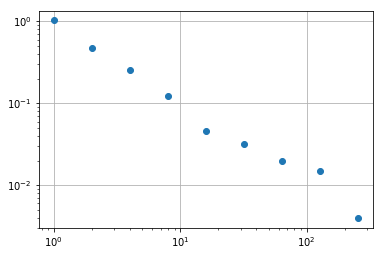

In [16]:
data = np.random.normal(size=1024)
Tn, va = allan_variance(data)
plt.loglog(Tn, va, 'o')
plt.grid()

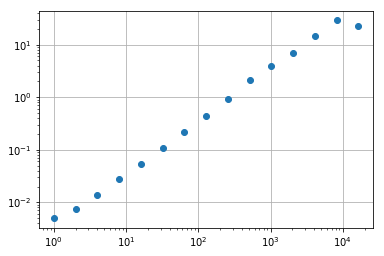

In [17]:
data = 0.1*np.cumsum(np.random.normal(size=2**16))
Tn, va = allan_variance(data)
plt.loglog(Tn, va, 'o')
plt.grid()

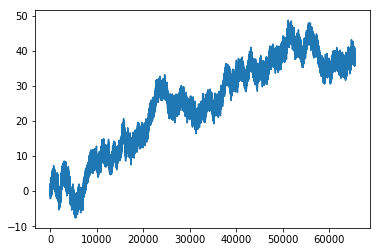

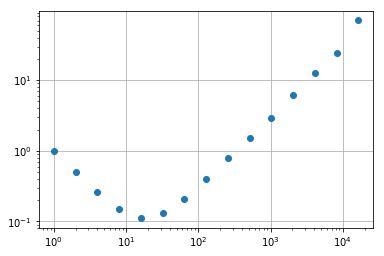

In [20]:
data = np.random.normal(size=2**16) + 0.1*np.cumsum(np.random.normal(size=2**16))
Tn, va = allan_variance(data)
plt.figure()
plt.plot(data)
plt.figure()
plt.loglog(Tn, va, 'o')
plt.grid()

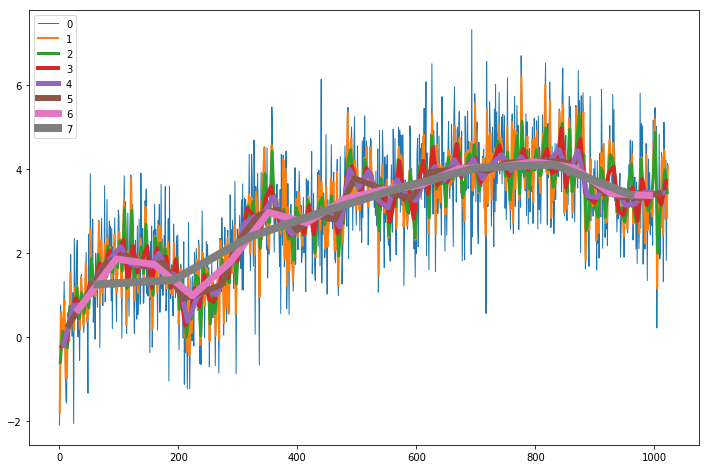

In [34]:
#data = np.random.normal(size=2**16) + 0.1*np.cumsum(np.random.normal(size=2**16))
plt.figure(figsize=(12,8))
time = np.arange(2**16)
for n in range(0,8):
    plt.plot(average(time[:2**10], 2**n), average(data[:2**10], 2**n), label=str(n), linewidth=n+1)
plt.legend()

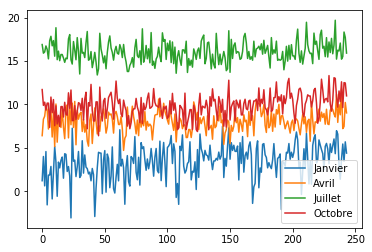

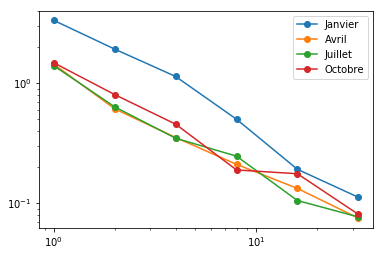

In [56]:
data = np.loadtxt('temperature_londres.dat')
liste_mois = ['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Decembre']
for mois in [1, 4, 7, 10]:
    plt.plot(data[:, mois], label=liste_mois[mois-1])
plt.legend()
plt.figure()
for mois in [1, 4, 7, 10]:
    Tn, va = allan_variance(data[:, mois])
    plt.loglog(Tn, va, 'o-', label=liste_mois[mois-1])
plt.legend()


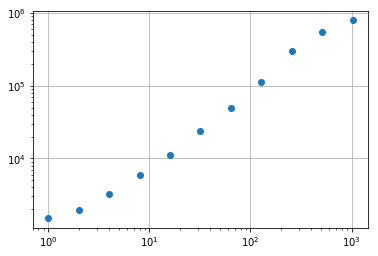

In [57]:
bourse = np.loadtxt("cac_40.csv", skiprows=4, delimiter=',', usecols=3, converters={3:eval})
Tn, va = allan_variance(bourse)
plt.loglog(Tn, va, 'o')
plt.grid()

array([1988.85, 1979.89, 2006.42, ..., 4513.49, 4528.66, 4546.65])